### Import packages

**Note that for this script to work, you need to have the following packages installed:**
- numpy - for numerical computation
- sympy with its dependencies - for symbolic computation (specifying functions and computing derivatives)
- matplotlib - graphical visualization of convergence of methods

```pip install numpy sympy matplotlib```

In [230]:
import sympy as sp # for symbolic math, to calculate derivatives and define functions
import warnings 
import matplotlib.pyplot as plt
import numpy as np
import math

### Specify precission for numerical operations

In [362]:
EPS = 1e-6 # eplison value, precision of numerical convergence

### Define functions: Newton's, secant and bisection methods

In [343]:
def newton(function, x0, keep_data = False):

    xn = x0 # init start value
    Df = sp.diff(function, x) # derivative of the function
    i = 0 # init counter

    if keep_data:
        data = []

    while True:
        
        if keep_data:
            data.append((i, xn))

        i = i + 1 # increment counter
        x_prev = xn # store previous value
        xn = xn - (function.subs(x, xn) / Df.subs(x, xn)).evalf() # new estimate

        if abs(xn - x_prev) < EPS: # if close enough, stop
            if keep_data:
                return xn, i, data
            return xn, i # return value as float and number of iterations
        
        if i > 1000: # prevent infinite loop
            warnings.warn("\nNewton's method did not converge! Returning last estimate.\n")
            if keep_data:
                return xn, i, data
            return xn, i # return value as float and number of iterations


    
def secant(function, x0, x1, keep_data = False):


    xn = x1 # init start value x n 
    xn_1 = x0 # init start value x n-1
    i = 0 # init counter

    if keep_data:
        data = []

    while True:
         
        if keep_data:
            data.append((i, xn))

        i = i + 1 # increment counter
        x_prev = xn # store previous value
        xn = xn - function.subs(x, xn) / (function.subs(x, xn) - function.subs(x, xn_1)) * (xn - xn_1) # new estimate
        xn_1 = x_prev # store previous value
        
        if abs(xn - x_prev) < EPS: # if close enough, stop
            if keep_data:
                return xn.evalf(), i, data
            return xn.evalf(), i # return value as float and number of iterations
        if i > 1000: # prevent infinite loop
            warnings.warn("\nSecant method did not converge! Returning last estimate.\n")
            if keep_data:
                return xn.evalf(), i, data
            return xn.evalf(), i # return value as float and number of iterations



def bisection(function, a, b, keep_data = False):
    
    i = 0 # init counter
    
    if keep_data:
        data = []

    while True:

        c = (a + b) / 2 # midpoint

        if keep_data:
            data.append((i, c))

        i = i + 1 # increment counter
        if abs(function.subs(x, c)) < EPS: # if root found, stop
            if keep_data:
                return c, i, data
            return c, i # return value as float and number of iterations

        elif function.subs(x, a) * function.subs(x, b) > 0:
            return None, i # no root or multiple roots in interval

        else:
            if function.subs(x, a) * function.subs(x, c) < 0:
                b = c
            elif function.subs(x, b) * function.subs(x, c) < 0:
                a = c
            
        if i > 1000: # prevent infinite loop
            warnings.warn("\nBisection method did not converge! Returning last estimate.\n")
            if keep_data:
                return c, i, data
            return c, i # return value as float and number of iterations

            



### Testing script

Specify function to be solved:

```
Suggestions:
- f(x) = x**2 - 2                                       x0 ≈ 1.41
- f(x) = x**3 - 5*x - 9                                 x0 ≈ 2.85
- f(x) = (sp.log(x) + sp.exp(x))/2 - 2 * (x**(1/2))     x0 ≈ 1.5
- f(x) = sp.log(x) + x                                  x0 ≈ 0.5
- f(x) = sp.exp(x) - 5                                  x0 ≈ 1.6
- f(x) = (sp.sin(x) + sp.log(x))**(0.85) - (4/5)        x0 ≈ 5.2 (multiple roots, arbitrary choice is x0, range for algorithms should be [4.7, ...]) 
                                                        
```

In [370]:
x = sp.symbols('x') # define x as a symbol

function = (sp.sin(x) + sp.log(x))**(0.85) - (4/5) # define function, use sympy packages for symbolic math

Specify initial guesses for different methods:

In [371]:
newton_x0 = 4.9
secant_x0, secant_x1 = 4.9,5.4
bisection_a, bisection_b = 4.9,5.4

Solve:

In [372]:
if __name__ == "__main__": # run script

    try:
        newton_ans, newton_iter = newton(function, newton_x0)
        secant_ans, secant_iter = secant(function, secant_x0, secant_x1)
        bisection_ans, bisection_iter = bisection(function, bisection_a, bisection_b)

        # format output information
        result_string = f""" 
            Function: \tf(x) = {function}
            Precision: \t{EPS}

            Method: \tInit values: \t\tResult: \tIterations:
            Newton's: \tx0={newton_x0:.1f} \t\t\t{newton_ans:.9f}\t{newton_iter}
            Secant: \tx0={secant_x0:.1f}, x1={secant_x1:.1f} \t\t{secant_ans:.9f} \t{secant_iter}
            Bisection:\ta={bisection_a:.1f}, b={bisection_b:.1f} \t\t{bisection_ans:.9f} \t{bisection_iter}
            """

        print(result_string)


    except:
        print("Error occured while solving for given function and init values. Please check your input.")


   

 
            Function: 	f(x) = (log(x) + sin(x))**0.85 - 0.8
            Precision: 	1e-06

            Method: 	Init values: 		Result: 	Iterations:
            Newton's: 	x0=4.9 			5.205888026	5
            Secant: 	x0=4.9, x1=5.4 		5.205888026 	5
            Bisection:	a=4.9, b=5.4 		5.205889130 	17
            


Plotting rate of convergence for different methods:

In [368]:
_, __, nd = newton(function, newton_x0, keep_data=True) # only data is needed in this case
_, __, sd = secant(function, secant_x0, secant_x1, keep_data=True) # only data is needed in this case
_, __, bd = bisection(function, bisection_a, bisection_b, keep_data=True) # only data is needed in this case

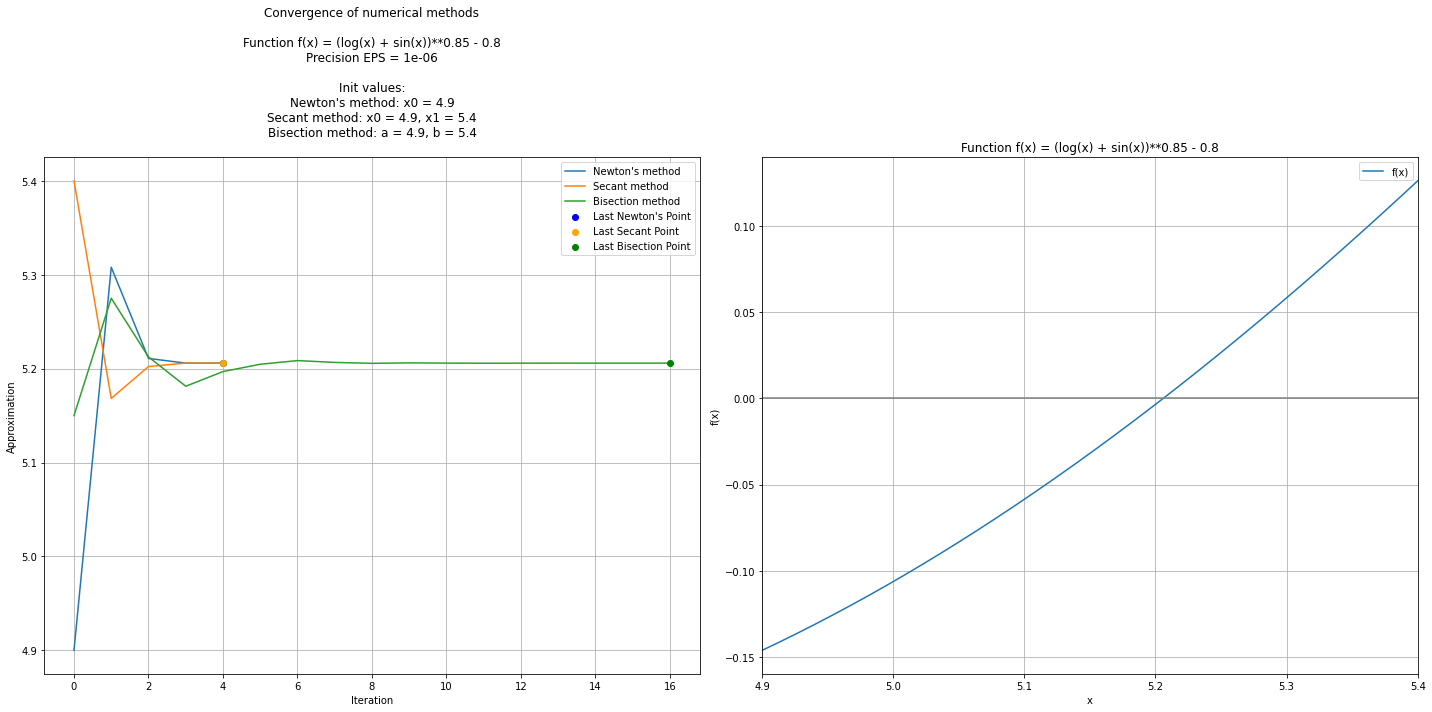

In [373]:
all_sol = [] # clear
real_sol = [] # clear
try:
    all_sol = sp.solveset(function, x) # analytic solution for given function, usefull to visualize convergence
    real_sol = [sol.evalf() for sol in all_sol if sol.is_real] # get only real solutions
except:
    pass # cannot solve equation analytically



# Create a figure with two subplots: one for your existing plot, and one for the function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot your existing data on the first subplot (ax1)
ax1.plot([i for i, _ in nd], [x for _, x in nd], label="Newton's method")
ax1.plot([i for i, _ in sd], [x for _, x in sd], label="Secant method")
ax1.plot([i for i, _ in bd], [x for _, x in bd], label="Bisection method")
ax1.scatter([nd[-1][0]], [nd[-1][1]], color='blue', marker='o', label="Last Newton's Point", zorder=5)
ax1.scatter([sd[-1][0]], [sd[-1][1]], color='orange', marker='o', label='Last Secant Point', zorder=5)
ax1.scatter([bd[-1][0]], [bd[-1][1]], color='green', marker='o', label='Last Bisection Point', zorder=5)
ax1.grid()
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Approximation")
title_text = f"""Convergence of numerical methods

Function f(x) = {function}
Precision EPS = {EPS}

Init values:
Newton's method: x0 = {newton_x0}
Secant method: x0 = {secant_x0}, x1 = {secant_x1}
Bisection method: a = {bisection_a}, b = {bisection_b}
"""
ax1.set_title(title_text)
try:
    for sol in real_sol:
        ax1.axhline(sol, color='r', linestyle='--', label="Analytic solution")
except:
    pass

ax1.legend()

# Plot the function on the second subplot (ax2)
x_value_min = min(secant_x0, secant_x1, bisection_a, bisection_b)
x_value_max = max(secant_x0, secant_x1, bisection_a, bisection_b)
x_values = np.linspace(x_value_min, x_value_max, 400) 

y_values = [function.evalf(subs={x: x_val}) for x_val in x_values]
ax2.plot(x_values, y_values, label="f(x)")
ax2.grid()
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
ax2.axhline(0, color='grey', linestyle='-')
ax2.axvline(0, color='grey', linestyle='-')
ax2.set_xlim(x_value_min, x_value_max)
ax2.set_title(f"Function f(x) = {function}")
ax2.legend()

plt.tight_layout()
plt.show()